In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=ie---------ie-tso-0002exittransmissionuk-ni------,ie---------ie-tso-0002entrytransmissionuk-ni------,ie---------ie-tso-0002exittransmissionuk---------,ie---------ie-tso-0002exitstorage,ie---------ie-tso-0002entrystorage,ie---------ie-tso-0002entrytransmissionuk---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                   id  dataSet dataSetLabel  \
0   1AggregatesIEIE---------IE-TSO-0002entryTransm...        1   Aggregates   
1   1AggregatesIEIE---------IE-TSO-0002exitTransmi...        1   Aggregates   
2   1AggregatesIEIE---------IE-TSO-0002entryTransm...        1   Aggregates   
3   1AggregatesIEIE---------IE-TSO-0002exitTransmi...        1   Aggregates   
4   1AggregatesIEIE---------IE-TSO-0002entryTransm...        1   Aggregates   
..                                                ...      ...          ...   
57  1AggregatesIEIE---------IE-TSO-0002exitTransmi...        1   Aggregates   
58  1AggregatesIEIE---------IE-TSO-0002entryTransm...        1   Aggregates   
59  1AggregatesIEIE---------IE-TSO-0002exitTransmi...        1   Aggregates   
60  1AggregatesIEIE---------IE-TSO-0002entryTransm...        1   Aggregates   
61  1AggregatesIEIE---------IE-TSO-0002exitTransmi...        1   Aggregates   

        indicator periodType        periodFrom     

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

   directionKey  day      value
0         entry    2  182788889
1          exit    2     613333
2         entry    3  194833333
3          exit    3     857778
4         entry    4  217755556
..          ...  ...        ...
57         exit   30     488889
58        entry   31  188741667
59         exit   31     728889
60        entry    1  210300000
61         exit    1     657778

[62 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                      value
day directionKey           
1   entry         210300000
    exit             657778
2   entry         182788889
    exit             613333
3   entry         194833333
...                     ...
29  exit             431111
30  entry         191288889
    exit             488889
31  entry         188741667
    exit             728889

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

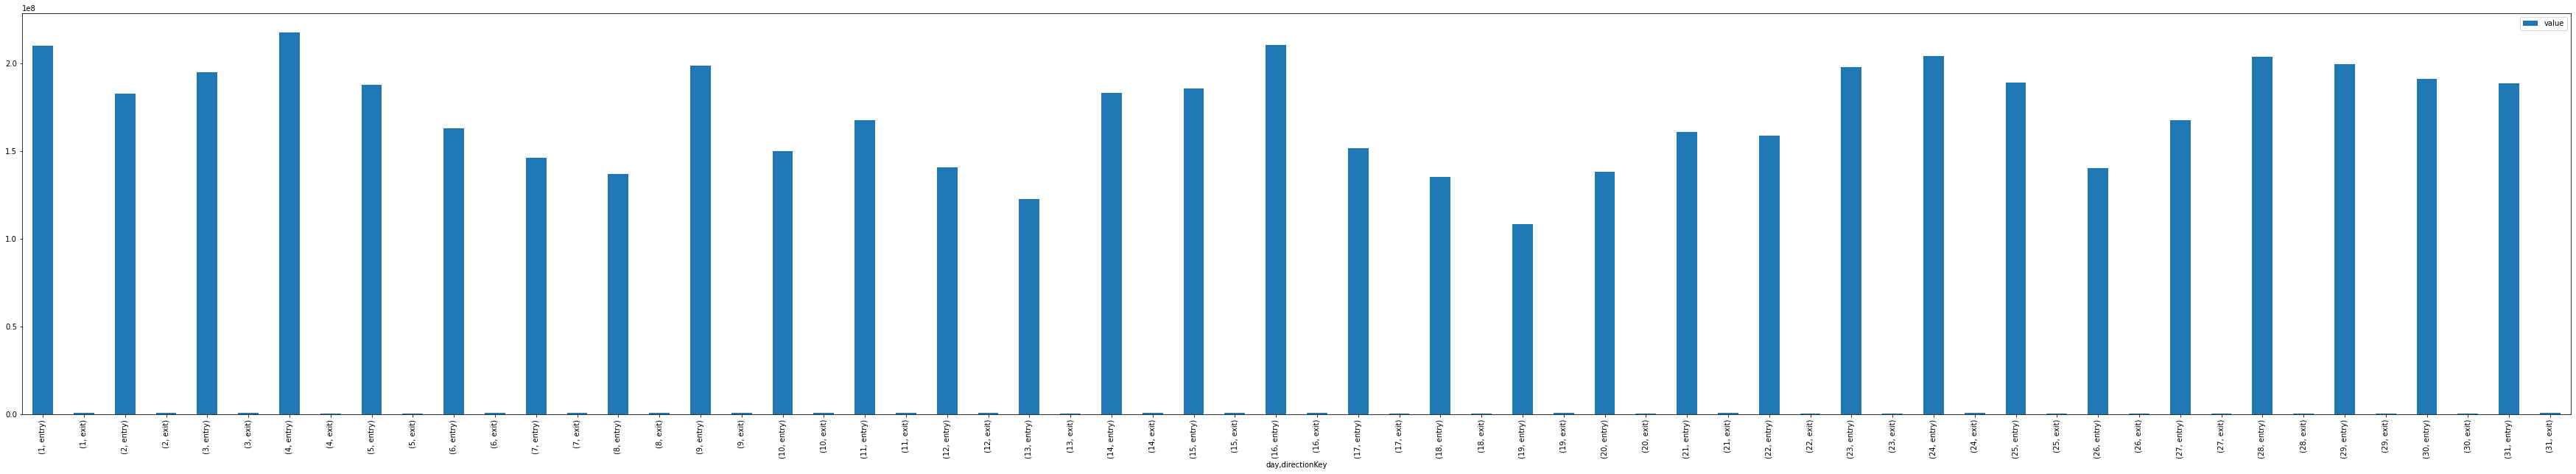

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))